<a href="https://colab.research.google.com/github/rgw3wgs/CS2-DS4002/blob/main/Project_Notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Voting

**Group 2: Randa Ampah, Neha Channamraju, Rebekah Weaver, Faith Koobial, Gian Baez, Aysha Hussen**

Summary:

This data is about voting in different counties in Virginia and through our data we wanted to predict how counties would vote. The way we tested this was by taking data from the 2020 election including the county name, what party the candidate that voting cycle was affiliated with, and how many people voted. The counties we looked at specifically were Accomack, Albemarle, Alleghany, Amelia, and Amherst. When we visualized the voting history in VA throughout the counties, we can see that there was a lot of overlap over the years between counties when it comes to voter turn out. When calculating the predicted results through the linear regression predictive model, we see that since Accomack, Alleghany, Amelia, and Amherst had negative results that means that they'd have an overall vote in favor of the republican candidate, but Albermarle county has a very high population compared to the other counties and it's positive. This is reflective in the overall final result, which is positive and demonstrates that Virginia will cast 39907 more votes for the democratic candidate.


Data:

Regarding the cleaning process of our data, it was given to us a well-prepared dataset that required minimal cleaning work beyond addressing the missing values. In order to have a more comprehensive dataset, we merged voters datasets with the counties’ datasets based on the FIPS code. In our analysis of Virginia’s voter data, demographic factors like county name and population as well as political indicators like party affiliation or candidate votes were some of the key variables that influenced election outcomes.

In [ ]:
# Importing the necessary libraries
import geopandas as gpd
! pip install mapclassify
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import fiona
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

### Loading and cleaning data

In [ ]:
# Loading in the data
! git clone https://github.com/Nehach73/DS3001_project_voting.git

voting = pd.read_csv('DS3001_project_voting/data/voting_VA.csv')
voting = voting.drop(columns=['Unnamed: 0', 'state', 'state_po', 'office', 'version', 'mode'], axis=1)
voting.head()

Cloning into 'DS3001_project_voting'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 167 (delta 44), reused 11 (delta 8), pack-reused 102
Receiving objects: 100% (167/167), 62.07 MiB | 9.19 MiB/s, done.
Resolving deltas: 100% (74/74), done.
Updating files: 100% (47/47), done.


,year,county_name,county_fips,candidate,party,candidatevotes,totalvotes
0,2000,ACCOMACK,51001,AL GORE,DEMOCRAT,5092,11925
1,2000,ACCOMACK,51001,GEORGE W. BUSH,REPUBLICAN,6352,11925
2,2000,ACCOMACK,51001,RALPH NADER,GREEN,220,11925
3,2000,ACCOMACK,51001,OTHER,OTHER,261,11925
4,2000,ALBEMARLE,51003,AL GORE,DEMOCRAT,16255,36846


In [ ]:
counties = pd.read_csv('DS3001_project_voting/data/county_adjacencies.csv')
counties = counties.rename(columns={'County':'county_name', 'FIPS':'county_fips'})
counties['county_name'] = counties['county_name'].str.upper()
counties.head()

,county_name,Population2022,county_fips,District,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,ACCOMACK,33191,51001,2,Northumberland,Lancaster,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALBEMARLE,114534,51003,5,CharlottesvilleCity,Nelson,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,ALEXANDRIACITY,155525,51510,8,Fairfax,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALLEGHANY,14835,51005,6,Craig,Bath,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AMELIA,13455,51007,5,PrinceEdward,Cumberland,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Combining both datasets
voting = pd.merge(voting, counties, on=['county_name','county_fips'], how='right')
voting.head()

,year,county_name,county_fips,candidate,party,candidatevotes,totalvotes,Population2022,District,N1,...,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,2000.0,ACCOMACK,51001,AL GORE,DEMOCRAT,5092.0,11925.0,33191,2,Northumberland,...,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000.0,ACCOMACK,51001,GEORGE W. BUSH,REPUBLICAN,6352.0,11925.0,33191,2,Northumberland,...,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000.0,ACCOMACK,51001,RALPH NADER,GREEN,220.0,11925.0,33191,2,Northumberland,...,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000.0,ACCOMACK,51001,OTHER,OTHER,261.0,11925.0,33191,2,Northumberland,...,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004.0,ACCOMACK,51001,JOHN KERRY,DEMOCRAT,5518.0,13356.0,33191,2,Northumberland,...,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Finding significant variables for the model
voting_vars = voting[['year', 'county_name', 'county_fips', 'Population2022', 'District']]
voting_vars = voting_vars.loc[(voting["party"] == "DEMOCRAT"),:] # removing duplicates
voting_vars.head()

# 2020 entries are showing up thrice, but every other year only shows up once
# Leaving this in could help weigh people's decision about the last election higher in our model

,year,county_name,county_fips,Population2022,District
0,2000.0,ACCOMACK,51001,33191,2
4,2004.0,ACCOMACK,51001,33191,2
7,2008.0,ACCOMACK,51001,33191,2
10,2012.0,ACCOMACK,51001,33191,2
13,2016.0,ACCOMACK,51001,33191,2


In [ ]:
# defining election result as the difference between dem and rep votes
votes = pd.DataFrame()
dem_votes = voting.loc[(voting["party"] == "DEMOCRAT"),:].groupby(['county_name', 'year'])["candidatevotes"].sum()
votes['dem_votes'] = dem_votes

rep_votes = voting.loc[(voting["party"] == "REPUBLICAN"),:].groupby(['county_name', 'year'])["candidatevotes"].sum()
votes['rep_votes'] = rep_votes

voting_vars = pd.merge(voting_vars, votes, on=['county_name', 'year'], how='right')
voting_vars['result'] = voting_vars['dem_votes']-voting_vars['rep_votes']


In [ ]:
voting_vars.head()

,year,county_name,county_fips,Population2022,District,dem_votes,rep_votes,result
0,2000.0,ACCOMACK,51001,33191,2,5092.0,6352.0,-1260.0
1,2004.0,ACCOMACK,51001,33191,2,5518.0,7726.0,-2208.0
2,2008.0,ACCOMACK,51001,33191,2,7607.0,7833.0,-226.0
3,2012.0,ACCOMACK,51001,33191,2,7655.0,8213.0,-558.0
4,2016.0,ACCOMACK,51001,33191,2,6740.0,8583.0,-1843.0


In [ ]:
# adding nhgis data
voting_vars['year_code'] = 2000
voting_vars.loc[((voting_vars['year']>=2008) & (voting_vars['year']<=2012)),'year_code']= 125
voting_vars.loc[((voting_vars['year']>=2015) & (voting_vars['year']<=2020)) ,'year_code'] = 195

In [ ]:
melted_df = pd.read_csv('/content/DS3001_project_voting/data/df_melt.csv')
melted_df = melted_df.rename(columns={'FIPS':'county_fips',"YEAR":'year_code'})

voting_vars = pd.merge(voting_vars, melted_df, on=['county_fips','year_code'], how='right')
voting_vars.head()

,year,county_name,county_fips,Population2022,District,dem_votes,rep_votes,result,year_code,AV0AA,...,A88AD,A88AE,AB2AA,BD5AA,AX6AA,CL6AA,AX7AA,AX7AB,BV8AA,BV8AB
0,2000.0,ACCOMACK,51001,33191.0,2.0,5092.0,6352.0,-1260.0,2000,38305.0,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
1,2004.0,ACCOMACK,51001,33191.0,2.0,5518.0,7726.0,-2208.0,2000,38305.0,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
2,2008.0,ACCOMACK,51001,33191.0,2.0,7607.0,7833.0,-226.0,125,33454.0,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
3,2012.0,ACCOMACK,51001,33191.0,2.0,7655.0,8213.0,-558.0,125,33454.0,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
4,2016.0,ACCOMACK,51001,33191.0,2.0,6740.0,8583.0,-1843.0,195,32673.0,...,2395.0,5072.0,57711.0,26018.0,32325.0,6141.0,6141.0,26184.0,677.0,6603.0


### Visualizing voting history in VA across counties

In [ ]:
import altair as alt
alt.Chart(voting_vars).mark_line().encode(
    alt.X('year:T'),
    alt.Y('result:Q'),
    color='county_name'
).properties(width=800, height=500)

# only visible in colab not github

alt.Chart(...)

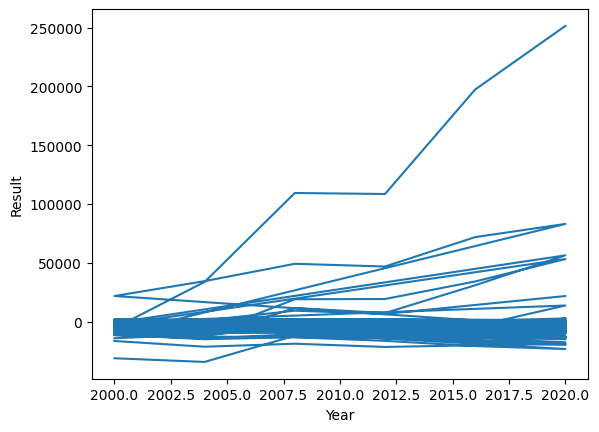

In [ ]:
plt.plot(voting_vars['year'], voting_vars['result'])
plt.xlabel('Year')
plt.ylabel("Result")
plt.show()
# simplified version of the plot visible in github

### Linear Regression Predictive Model



In [ ]:
# Removing NANs by mean replacement since dropna is not working
voting_vars['dem_votes'].fillna(voting_vars['dem_votes'].mean(), inplace=True)
voting_vars['rep_votes'].fillna(voting_vars['rep_votes'].mean(), inplace=True)
voting_vars['District'].fillna(voting_vars['District'].mean(), inplace=True)
voting_vars['year'].fillna(voting_vars['year'].mean(), inplace=True)
voting_vars['Population2022'].fillna(voting_vars['Population2022'].mean(), inplace=True)
voting_vars['county_fips'].fillna(voting_vars['county_fips'].mean(), inplace=True)
voting_vars['result'].fillna(voting_vars['result'].mean(), inplace=True)

In [ ]:
voting_vars['AB2AA'].fillna(voting_vars['AB2AA'].mean(), inplace=True)
voting_vars['CL6AA'].fillna(voting_vars['CL6AA'].mean(), inplace=True)
voting_vars['AT5AA'].fillna(voting_vars['AT5AA'].mean(), inplace=True)

In [ ]:
voting_vars.head(200)

,year,county_name,county_fips,Population2022,District,dem_votes,rep_votes,result,year_code,AV0AA,...,A88AD,A88AE,AB2AA,BD5AA,AX6AA,CL6AA,AX7AA,AX7AB,BV8AA,BV8AB
0,2000.0,ACCOMACK,51001,33191.000000,2.0,5092.000000,6352.000000,-1260.000000,2000,38305.0,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
1,2004.0,ACCOMACK,51001,33191.000000,2.0,5518.000000,7726.000000,-2208.000000,2000,38305.0,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
2,2008.0,ACCOMACK,51001,33191.000000,2.0,7607.000000,7833.000000,-226.000000,125,33454.0,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
3,2012.0,ACCOMACK,51001,33191.000000,2.0,7655.000000,8213.000000,-558.000000,125,33454.0,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
4,2016.0,ACCOMACK,51001,33191.000000,2.0,6740.000000,8583.000000,-1843.000000,195,32673.0,...,2395.0,5072.0,57711.0,26018.0,32325.0,6141.0,6141.0,26184.0,677.0,6603.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2012.5,NaN,51580,62843.729412,6.0,13807.304412,14526.305882,-719.001471,2000,6303.0,...,655.0,557.0,36640.0,16758.0,6251.0,806.0,806.0,5445.0,117.0,1172.0
196,2012.5,NaN,51580,62843.729412,6.0,13807.304412,14526.305882,-719.001471,125,5903.0,...,456.0,655.0,47618.0,20055.0,5839.0,1241.0,1241.0,4598.0,74.0,1030.0
197,2012.5,NaN,51580,62843.729412,6.0,13807.304412,14526.305882,-719.001471,195,5598.0,...,447.0,773.0,57614.0,25309.0,5476.0,722.0,722.0,4754.0,116.0,1015.0
198,2000.0,CRAIG,51045,4847.000000,9.0,851.000000,1580.000000,-729.000000,2000,5091.0,...,619.0,517.0,41750.0,17322.0,5069.0,520.0,520.0,4549.0,73.0,623.0


In [ ]:
y = voting_vars['result']
X = voting_vars.loc[:,['county_fips', 'Population2022', 'District', 'AB2AA', 'CL6AA', 'AT5AA']]

# Median family income in previous year, Persons below Poverty Level in Previous Year, Persons born in the US

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = pd.concat([X_train['Population2022'], X_train['county_fips'], X_train['District'], X_train['AB2AA'], X_train['CL6AA'], X_train['AT5AA']], axis = 1)
Z_test = pd.concat([X_test['Population2022'], X_test['county_fips'], X_test['District'], X_test['AB2AA'], X_test['CL6AA'], X_test['AT5AA']], axis = 1)

reg = LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.5650984962407616
RMSE:  11002.08938869604


,variable,coefficient
0,Population2022,0.138613
1,county_fips,-0.343064
2,District,-181.349806
3,AB2AA,0.150855
4,CL6AA,1.424603
5,AT5AA,-0.160250


#### Calculating the result for each county

In [ ]:
# Using 2020 data for the prediction
prediction_df = voting_vars.loc[voting_vars['year']==2020,:]

for c in prediction_df['county_fips'].unique():
  county_df = prediction_df.loc[prediction_df['county_fips']==c,:]
  pred_result = reg.predict(county_df[['Population2022', 'county_fips', 'District', 'AB2AA', 'CL6AA', 'AT5AA']])
  prediction_df.loc[prediction_df['county_fips']==c,'pred_result'] = pred_result

prediction_df.drop_duplicates(subset=['county_fips'], inplace=True)
prediction_df = prediction_df[['county_name', 'pred_result']]
prediction_df.head()

<ipython-input-17-ca2294628ce0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_df.loc[prediction_df['county_fips']==c,'pred_result'] = pred_result
<ipython-input-17-ca2294628ce0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_df.drop_duplicates(subset=['county_fips'], inplace=True)


,county_name,pred_result
5,ACCOMACK,-635.306718
13,ALBEMARLE,10623.173837
24,ALLEGHANY,-5870.881066
32,AMELIA,-4286.165406
40,AMHERST,-2220.637997


In [ ]:
# Final statewide election result

final_result = 0

for i in prediction_df['pred_result']:
  final_result += i

print(final_result)

39906.922446479686


Since the final result is a positive number, this model predicts that Virginians will cast 39907 more votes for the democratic candidate than the republican candidate, resulting in the democratic party winning the presidential election in the state.

Conclusion:
The project aimed to analyze voting data from various counties in Virginia to predict electoral outcomes using demographic and historical voting patterns. By merging voter records with county information, we created a dataset that included key variables such as county name, population, party affiliation, and candidate votes. Utilizing a linear regression predictive model, we calculated expected results for the 2020 election, which indicated a projected victory for the Democratic party in Virginia.

One potential criticism of our project could be the predictive model used. Linear regression may not show more complex parts of voting behavior, which is influenced by factors such as political ideologies, socioeconomic status, and historical context. However, our model accounted for demographic factors such as population size and district characteristics, which are known to influence voting patterns. Also, by visualizing voting history across counties, we gained information about trends and patterns that informed our analysis. Another criticism could be the assumption that past voting behavior is indicative of future outcomes. Voting patterns can evolve over time due to changing demographics and political landscapes. We can still look at our data for common trends. Our model included recent election data, which reflects the most up-to-date voter sentiments.


In the future we could involve sentiment analysis by analyzing social media data to gauge public sentiment and its influence on voting behavior. This could provide information into voter preferences leading up to an election. We could also use different types of models or algorithms to look at relationships on a different level. Adding economic indicators into the model, such as unemployment rates and income levels, could provide a  better understanding of the factors shaping voter behavior. Lastly, looking at voter turnout to find different factors influencing voter participation and how it could impact the election.